#### Question 8.1
>Describe a situation or problem from your job, everyday life, current events, etc., for which a linear regression model would be appropriate. List some (up to 5) predictors that you might use.

One area that I have used linear regression before is to predict enrollment numbers at several K-12 schools. Some of the variables used include:
1) Feeder school enrollment (current 8th graders for HS, 5th graders for MS etc.)
2) Informational Meeting Attendance
3) Current enrollment by grade level
4) Current applications in progress
5) Completed applications to date

#### Question 8.2
>Using crime data from http://www.statsci.org/data/general/uscrime.txt (file uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html ), use regression (a useful R function is lm or glm) to predict the observed crime rate in a city with the following data:
>1) M = 14.0
2) So = 0
3) Ed = 10.0
4) Po1 = 12.0
5) Po2 = 15.5
6) LF = 0.640
10) M.F = 94.0 Pop = 150
11) NW = 1.1
12) U1 = 0.120
13) U2 = 3.6
14) Wealth = 3200
15) Ineq = 20.1
16) Prob = 0.04
17) Time = 39.0

>Show your model (factors used and their coefficients), the software output, and the quality of fit.
Note that because there are only 47 data points and 15 predictors, you’ll probably notice some overfitting. We’ll see ways of dealing with this sort of problem later in the course.

To create a predictive regression model of the uscrime.txt data I'll use the lm() function that is a part of the stats package which is one of R's base packages. The syntax for the lm() model can be found here: https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/lm. 

I found the CMU lecture on this topic useful for this analysis and adopted several of the techniques they used, the lecture can be found here: https://www.andrew.cmu.edu/user/achoulde/94842/lectures/lecture09/lecture09-94842.html.

In order to use the lm() function to create a linear regression model I am going to follow the steps below:

1) Explore the data to gain a better understanding of the dataset
2) Check the assumptions of linear regression
3) Fit a linear regression model to the data and assess it's quality
4) Use the linear regression model to predict the crime rate for the given data point
5) Provide a summary of the final linear regression model

#### Step 1 - Explore the Data
For this step I am going to visually inspect the data, get summary statistics to get a sense of the properties of the values in the data, and read about the data to understand what each value represents.  I'll start by loading the libraries I need for this analysis and loading the data.

In [1]:
# Set seed so output is reproducible
set.seed(123)

# Load libraries needed for analysis
library(ggplot2)
library(DAAG)
library(tidyverse)
library(GGally)
library(knitr)
library(cowplot)
library(energy)
library(car)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Loading required package: lattice
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  3.1.2     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   1.0.6
v readr   1.3.1     v stringr 1.4.0
v tibble  3.1.2     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'cowplot' was built under R version 3.6.3"Warning message:
"package 'energy' was built under R version 3.6.3"Loadi

In [2]:
# Load the data
crime_data <- read.table("uscrime.txt", header = TRUE)

In [3]:
# Visually inspect the data, for this report I only printed the first few rows but inspected all of them
head(crime_data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [4]:
# Look at a summary of the data
summary(crime_data)

       M               So               Ed             Po1       
 Min.   :11.90   Min.   :0.0000   Min.   : 8.70   Min.   : 4.50  
 1st Qu.:13.00   1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25  
 Median :13.60   Median :0.0000   Median :10.80   Median : 7.80  
 Mean   :13.86   Mean   :0.3404   Mean   :10.56   Mean   : 8.50  
 3rd Qu.:14.60   3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45  
 Max.   :17.70   Max.   :1.0000   Max.   :12.20   Max.   :16.60  
      Po2               LF              M.F              Pop        
 Min.   : 4.100   Min.   :0.4800   Min.   : 93.40   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:0.5305   1st Qu.: 96.45   1st Qu.: 10.00  
 Median : 7.300   Median :0.5600   Median : 97.70   Median : 25.00  
 Mean   : 8.023   Mean   :0.5612   Mean   : 98.30   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:0.5930   3rd Qu.: 99.20   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :0.6410   Max.   :107.10   Max.   :168.00  
       NW              U1                U2            

Looking at the information provided at http://www.statsci.org/data/general/uscrime.html has some interesting observations. In addition to providing a description of what the data is, the Analysis section provides some useful insight on the data and states that "crime is slightly better modelled on a log scale". It also has an example analysis fitting a linear regression model to the data.

But before all that, I don't like the labels for some of the columns in the data as it is hard to understand what they represent just by their name. A description of the attributes taken from the website can be seen below. Next, I am going to rename my columns to match the descriptions a little better. I am also going to make a couple of tweaks to the data, I am going to turn the LF, M.F, U1, and Prob variables into percentages to match the M, NW, U2 and Ineq variables. It seems odd that the U2 variable would be as a percentage and the U1 variable is set as a ratio since they represent the same thing for different age groups. I also just want the consistency of having everything listed as a percentage. I will of course have to apply the same transformation to the values from the data point we are trying to predict.

    M:      percentage of males aged 14-24 in total state population
    So:     indicator variable for Southern states (0 = No, 1 = Yes)
    Ed:     mean years of schooling of the population aged 25 years or over
    Po1:    per capita expenditure on police protection in 1960
    Po2:    per capita expenditure on police protection in 1959
    LF:     labor force participation rate of civilian urban males in the age-group 14-24
    M.F:    number of males per 100 females
    Pop:    state population size in hundred thousands
    NW:     percentage of nonwhites in the population
    U1:     unemployment rate of urban males 14-24
    U2:     unemployment rate of urban males 35-39
    Wealth: median value of transferable assets or family income
    Ineq:   percentage of families earning below half the median income
    Prob:   probability of imprisonment: ratio of number of commitments to number of offenses
    Time:   average time in months served by offenders in state prisons before their first release
    Crime:  number of offenses per 100,000 population in 1960

In [5]:
# Assign more meaningful variable names and update several values in the dataset (not necessary but it makes it easier for me to interpret)
# %>% is a pipe operator that allows several operations (rename and mutate) to occur
crime_data <- crime_data %>%
  rename(percent_young_male = M,
         southern_state = So,
         average_ed = Ed,
         per_cap_exp_1960 = Po1,
         per_cap_exp_1959 = Po2,
         laborforce_part = LF,
         percent_male = M.F,
         population = Pop,
         nonwhite = NW,
         unemp_youth = U1,
         unemp_adult = U2,
         median_assets = Wealth,
         low_income = Ineq,
         prob_imprisonment = Prob,
         time_served = Time,
         crimes_per_million = Crime) %>%
  mutate(laborforce_part = laborforce_part * 100,
         percent_male = (percent_male / (percent_male + 100)) * 100,
         unemp_youth = unemp_youth * 100,
         prob_imprisonment = prob_imprisonment * 100)

# print summary of the transformed data
summary(crime_data)

 percent_young_male southern_state     average_ed    per_cap_exp_1960
 Min.   :11.90      Min.   :0.0000   Min.   : 8.70   Min.   : 4.50   
 1st Qu.:13.00      1st Qu.:0.0000   1st Qu.: 9.75   1st Qu.: 6.25   
 Median :13.60      Median :0.0000   Median :10.80   Median : 7.80   
 Mean   :13.86      Mean   :0.3404   Mean   :10.56   Mean   : 8.50   
 3rd Qu.:14.60      3rd Qu.:1.0000   3rd Qu.:11.45   3rd Qu.:10.45   
 Max.   :17.70      Max.   :1.0000   Max.   :12.20   Max.   :16.60   
 per_cap_exp_1959 laborforce_part  percent_male     population    
 Min.   : 4.100   Min.   :48.00   Min.   :48.29   Min.   :  3.00  
 1st Qu.: 5.850   1st Qu.:53.05   1st Qu.:49.10   1st Qu.: 10.00  
 Median : 7.300   Median :56.00   Median :49.42   Median : 25.00  
 Mean   : 8.023   Mean   :56.12   Mean   :49.56   Mean   : 36.62  
 3rd Qu.: 9.700   3rd Qu.:59.30   3rd Qu.:49.80   3rd Qu.: 41.50  
 Max.   :15.700   Max.   :64.10   Max.   :51.71   Max.   :168.00  
    nonwhite      unemp_youth      unemp_

In [6]:
# Output the data class for each column
sapply(crime_data, class)

percent_young_male     southern_state         average_ed   per_cap_exp_1960 
         "numeric"          "integer"          "numeric"          "numeric" 
  per_cap_exp_1959    laborforce_part       percent_male         population 
         "numeric"          "numeric"          "numeric"          "integer" 
          nonwhite        unemp_youth        unemp_adult      median_assets 
         "numeric"          "numeric"          "numeric"          "integer" 
        low_income  prob_imprisonment        time_served crimes_per_million 
         "numeric"          "numeric"          "numeric"          "integer"

In [7]:
# Double check size of the data
cat('Rows','Columns')
t(dim(crime_data))

Rows Columns

47,16


This lets me know that I have a table with 47 rows and 16 columns. The data is a combination of integer and float (numeric) values. Just thinking about the data and what it represents I expect collinearity between per_cap_exp_1960 and per_cap_exp_1959, and between unemp_youth and unemp_adult. One of the things I'll do is see if this is true and if any other collinearity exists since it can create issues with regression models.

#### Step 2 - Check that the Data meets the Assumptions of Simple Linear Regression
Linear regression should only be used on data that meets the folloing assumptions, which I found at https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/:

1) Linear relationship - The relationship between the independent and dependent variables should be linear
2) Multivariate normality - The dataset should be multivariate normal
3) Limited multicollinearity - Multicollinearity occurs when the independent variables are too highly correlated with each other
4) Limited auto-correlation - Autocorrelation occurs when the residuals are not independent from each other.  In other words when the value of y(x+1) is not independent from the value of y(x)
5) Homoscendasticity - Heteroscedasticity is present when the size of the error term (or the variance) differs across values of an independent variable.

I'm going to check for each of these assumptions below.

##### Assumption 1 - Linear relationship
To look at the relationship between the various inpdependent variables and the crimes_per_million variable I am going to create scatter plots and visually inspect them.

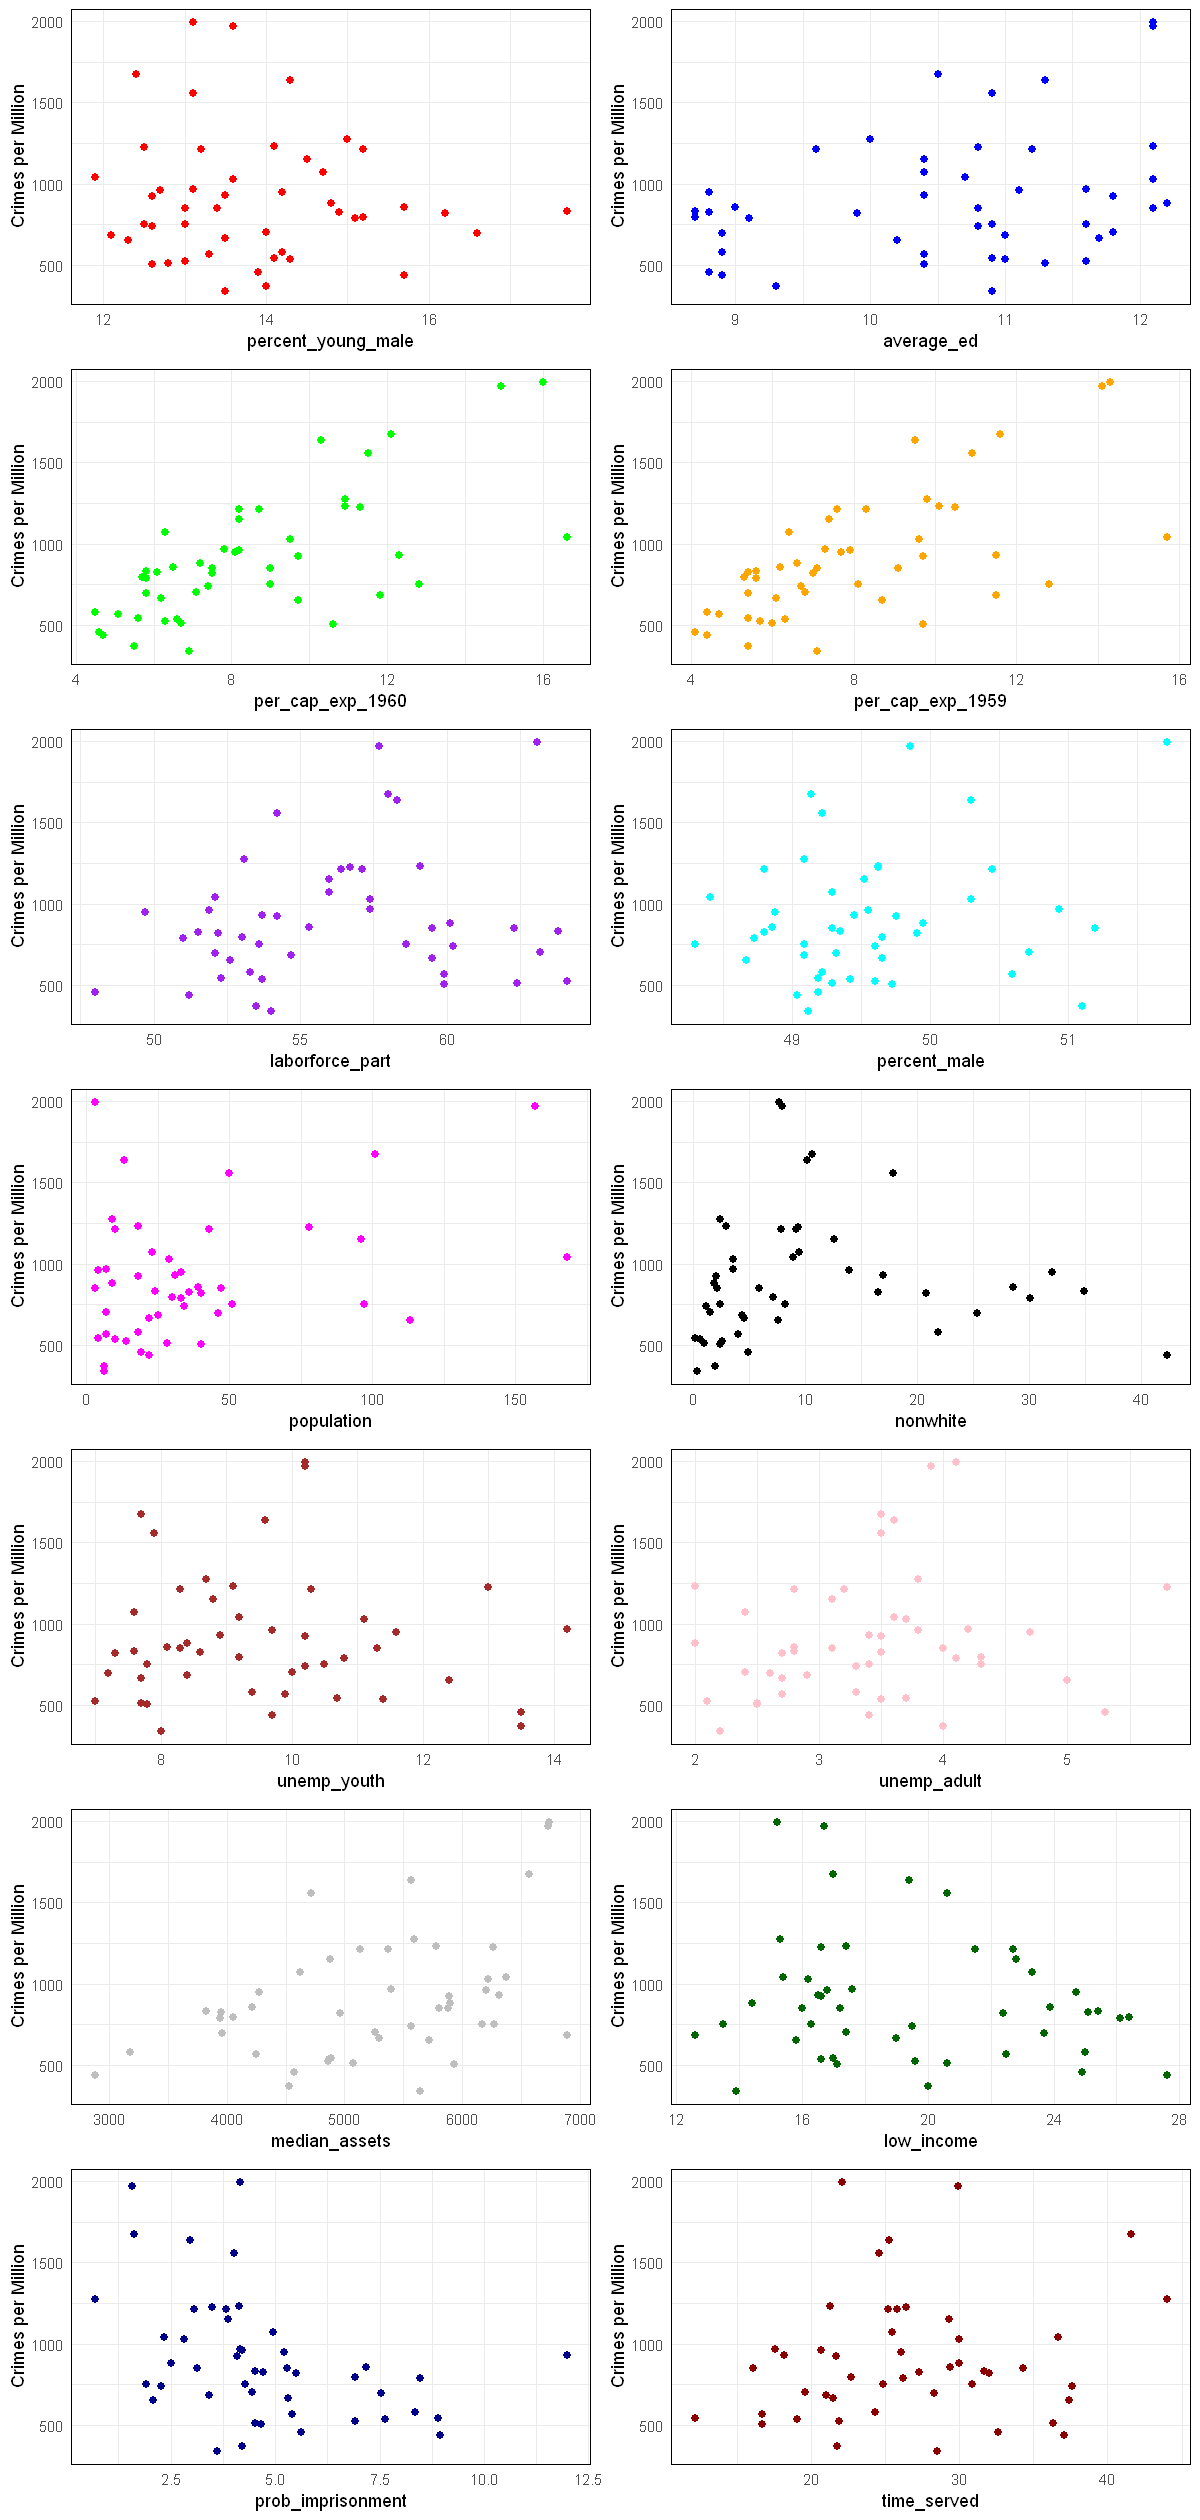

In [8]:
# Define a vector of colors for each variable
variable_colors <- c("percent_young_male" = "red",
                     "average_ed" = "blue",
                     "per_cap_exp_1960" = "green",
                     "per_cap_exp_1959" = "orange",
                     "laborforce_part" = "purple",
                     "percent_male" = "cyan",
                     "population" = "magenta",
                     "nonwhite" = "black",
                     "unemp_youth" = "brown",
                     "unemp_adult" = "pink",
                     "median_assets" = "gray",
                     "low_income" = "darkgreen",
                     "prob_imprisonment" = "darkblue",
                     "time_served" = "darkred")

# Set the figure dimensions for display in the notebook
options(repr.plot.width = 10, repr.plot.height = 21)

# Create plots for each variable
plots <- list()

# Add plots to the list
for (var_name in names(variable_colors)) {
  plot <- ggplot(crime_data, aes_string(x = var_name, y = "crimes_per_million", color = as.factor(var_name))) +
    geom_point(size = 2) +
    labs(x = var_name, y = "Crimes per Million") +
    theme_minimal() +
    scale_color_manual(values = variable_colors[var_name]) +  # Set color scale for this plot
    theme(panel.border = element_rect(color = "black", fill = NA),
          legend.position = "none")
  
  plots[[var_name]] <- plot
}

# Create a grid of plots
cowplot::plot_grid(plotlist = plots, ncol = 2)

Some of the plots have clear linear relationship (per_cap_exp_1960 for example) while others are less obvious. They don't show any obvious non-linear relatinpships (polynomial, logistic etc.) so I am going to calculate the correlation coefficient for each independent variable below to get a better sense of the relationship. I am calculating the Pearson correlation coefficient which is a measure of the strength and direction of the linear relatinoship between the two variables and will output a heatmap that shows those values as well as a print out of the actual values.

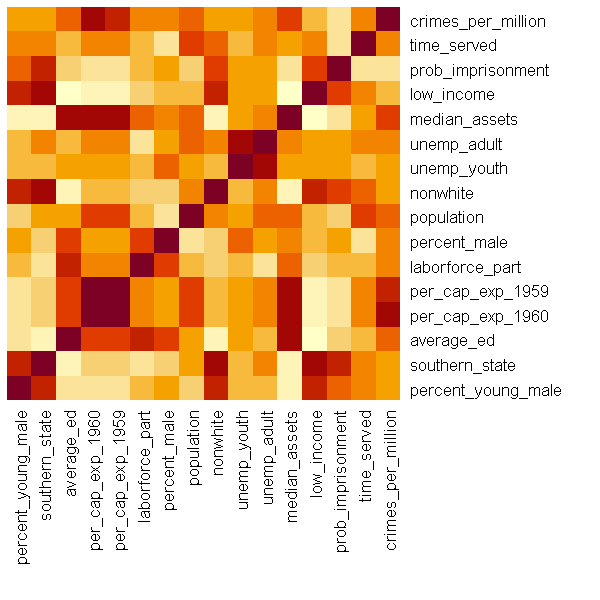

In [9]:
# Calculate the corelatinp coefficients between all variables
correlations <- cor(crime_data)

# Plot heatmap
options(repr.plot.width=5, repr.plot.height=5)
heatmap(correlations, symm = TRUE, margins = c(10,10), Rowv = NA, Colv = NA)

Looking at the heatmap a couple things jump out, the first is the high correlation coefficient which implies colinearity between unemp_adult and unemp_yout, and between per_cap_exp_1959 and per_cap_exp_1960. It also shows strong correlation between per_cap_exp_1960, median_assets and crimes_per_million. Next I'll print out the actual correlation values.

In [10]:
# Extract the correlations with 'crimes_per_million' column and convert it to a vector
cor_with_crimes <- correlations['crimes_per_million', ]
cor_with_crimes <- as.vector(cor_with_crimes[!is.na(cor_with_crimes)])

# Print column names and their corresponding correlations
column_names <- colnames(correlations)
for (i in seq_along(cor_with_crimes)) {
  print(paste(column_names[i], ":", cor_with_crimes[i]))
}

[1] "percent_young_male : -0.0894724007536989"
[1] "southern_state : -0.0906369589518858"
[1] "average_ed : 0.322834869529708"
[1] "per_cap_exp_1960 : 0.68760445570693"
[1] "per_cap_exp_1959 : 0.666714142200937"
[1] "laborforce_part : 0.188866347502635"
[1] "percent_male : 0.21157263163909"
[1] "population : 0.337474061306272"
[1] "nonwhite : 0.0325988360341708"
[1] "unemp_youth : -0.0504779180638913"
[1] "unemp_adult : 0.177320647706051"
[1] "median_assets : 0.441319948973445"
[1] "low_income : -0.179023730641599"
[1] "prob_imprisonment : -0.427422188066402"
[1] "time_served : 0.149866061742601"
[1] "crimes_per_million : 1"


This shows that the per_cap_exp_1960 and per_cap_exp_1959 have very strong correlations with crimes_per_million (~ .67). The other independent variables that have strong correlations are median_assets (~ 0.44), prob_imprisonment (~ -0.44), population (0.34), and average_ed (0.32). Some variable with very weak correlations include percent_young_male, southern_state, and unemp_youth. It is likely that only using the variable that exhibit strong correlations with crimes_per_million would create a better model.

Interestingly enough, the positive relationships with the per capita expenditure and crimes per million indicates that the more money that is spent the higher the crime rate, this makes sense as we expect communities with higher crime rates to spend more money combatting it. It is a perfect example of "correlation does not imply causation", as spending more money on policing wouldn't cause an increase in crime rates. Median assets and average education are also interesting, the positive relationship indicates that as they increase so does the crime rate. This could incdicate large wealth disparities in those communities or more crimes of opportunity. It would be interesting to see the data that is used to create those stats to understand those relationships more. But for now, we are on to checking the normality of the data!

##### Assumption 2 - Multivariate Normality
Next I am going to check for multivariate normality which is described here: https://online.stat.psu.edu/stat505/book/export/html/636. This is checking if every linear combination of variables has a univariate normal distribution. There are several ways to do this but I am going to use the Energy test based on the documentation found here: https://www.statology.org/multivariate-normality-test-r/.

In [11]:
# Check for multivariate normality, leaving out the southern_state variable since it is really a factor and is not continous
mvnorm.etest(crime_data[, !(names(crime_data) %in% c("southern_state"))], R=10000)


	Energy test of multivariate normality: estimated parameters

data:  x, sample size 47, dimension 15, replicates 10000
E-statistic = 2.1876, p-value < 2.2e-16


The low p-value indicates that we should reject the null hypothesis (The variables follow a multivariate normal distribution) and shows that we do have evidence that indicates our variables do not follow a a multivariate distribution. I am going to check the univariate normality of each of the variables below to see if it provides any insight. While variables following a univariate normal distribution doesn't mean that as a whole they will be multivariate, it could provide insight into where the issue is coming from. I am going to include a historgram, QQ plot, box plot, and run the Shapiro-Wilk test. This is overkill but I'm interested in how to set up a more robust system to check for assumptions when their is more than one option.

Shapiro-Wilk Test for percent_young_male : 
  Test Statistic: 0.9479701 
  p-value: 0.03607538 



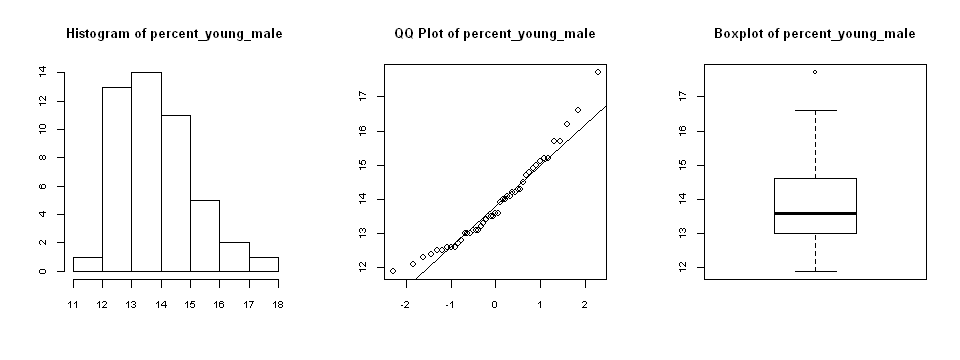

Shapiro-Wilk Test for average_ed : 
  Test Statistic: 0.9194494 
  p-value: 0.003196959 



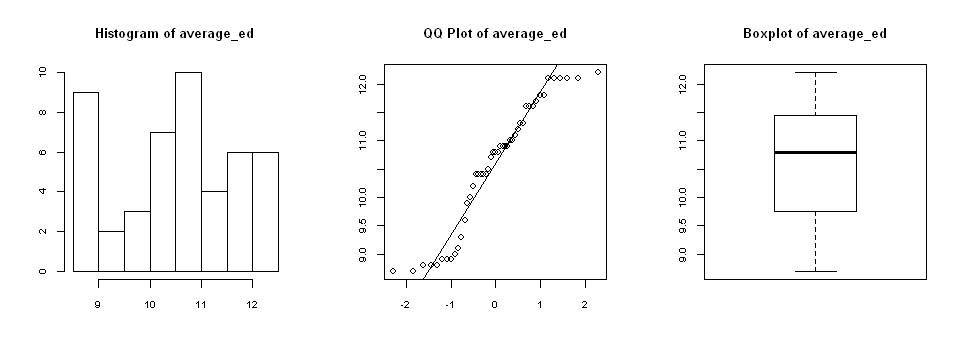

Shapiro-Wilk Test for per_cap_exp_1960 : 
  Test Statistic: 0.9230723 
  p-value: 0.004280818 



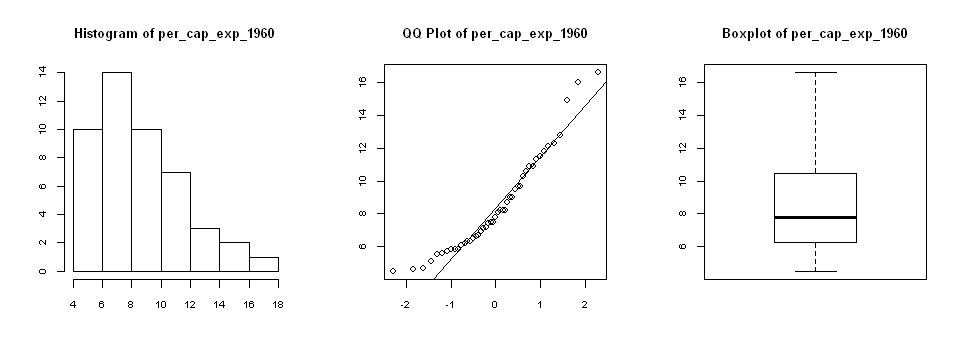

Shapiro-Wilk Test for per_cap_exp_1959 : 
  Test Statistic: 0.928306 
  p-value: 0.006580799 



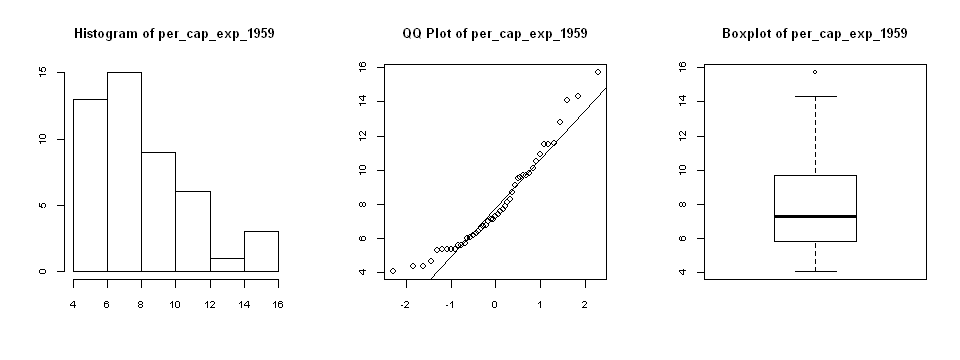

Shapiro-Wilk Test for laborforce_part : 
  Test Statistic: 0.9651545 
  p-value: 0.1719905 



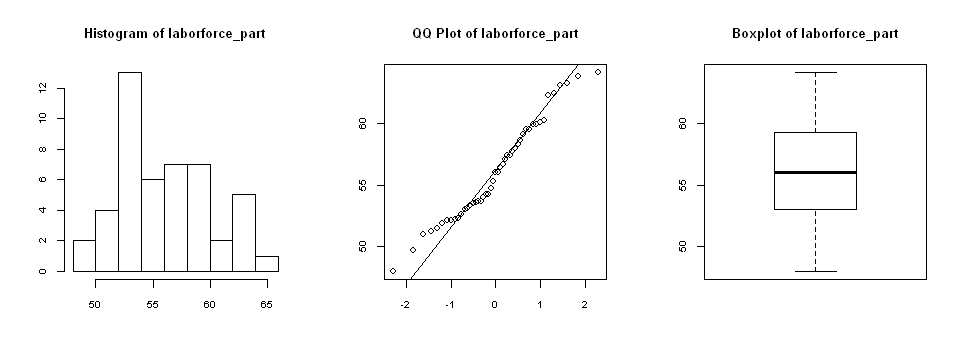

Shapiro-Wilk Test for percent_male : 
  Test Statistic: 0.9301336 
  p-value: 0.007664791 



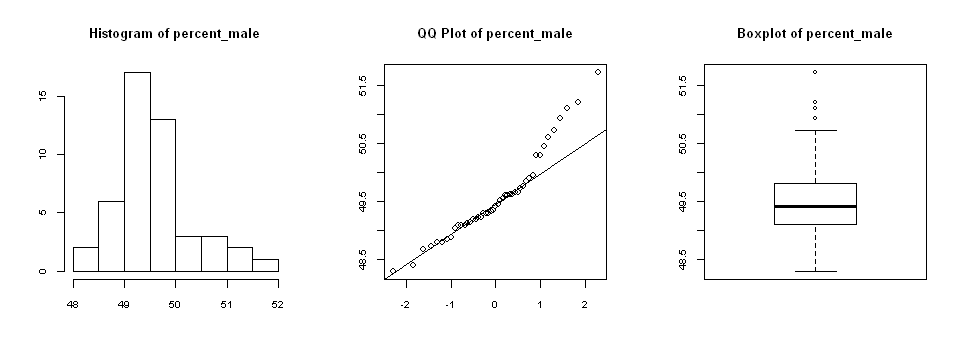

Shapiro-Wilk Test for population : 
  Test Statistic: 0.7622085 
  p-value: 2.490781e-07 



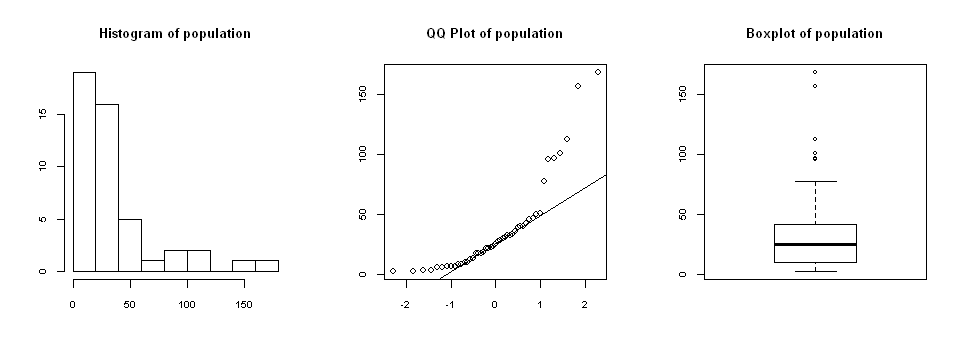

Shapiro-Wilk Test for nonwhite : 
  Test Statistic: 0.820361 
  p-value: 4.68722e-06 



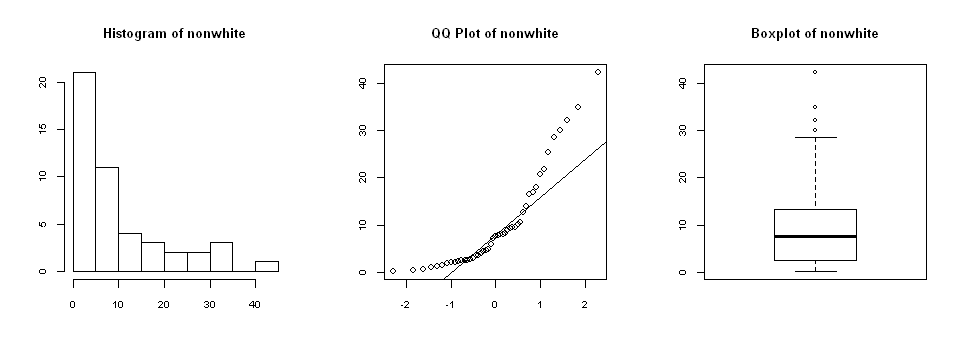

Shapiro-Wilk Test for unemp_youth : 
  Test Statistic: 0.9315271 
  p-value: 0.008616725 



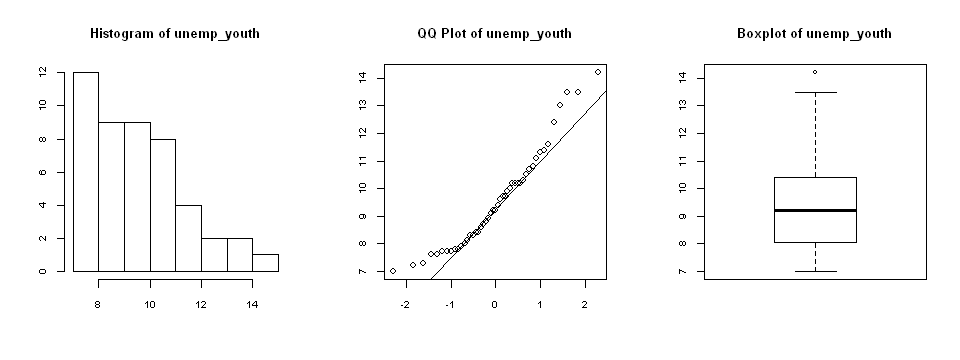

Shapiro-Wilk Test for unemp_adult : 
  Test Statistic: 0.9675499 
  p-value: 0.2133081 



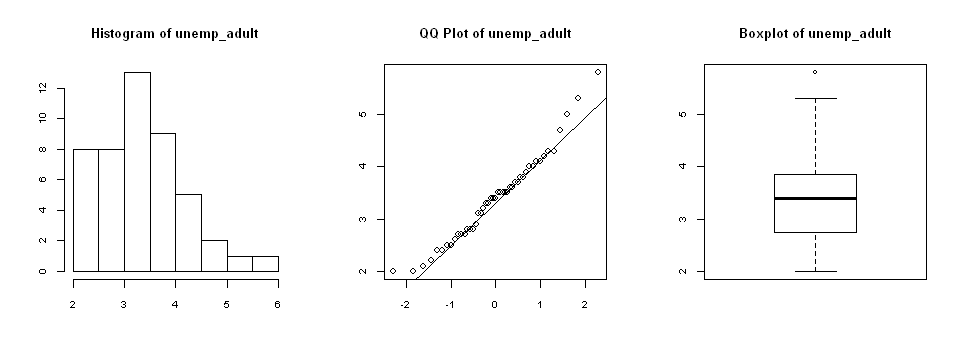

Shapiro-Wilk Test for median_assets : 
  Test Statistic: 0.9728094 
  p-value: 0.3375134 



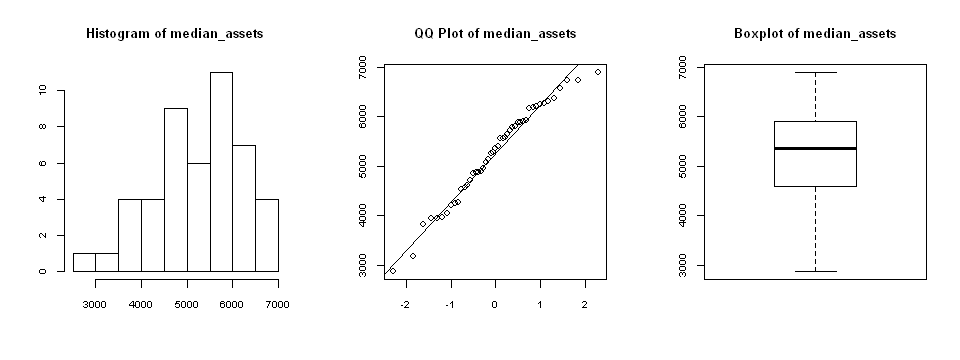

Shapiro-Wilk Test for low_income : 
  Test Statistic: 0.936528 
  p-value: 0.01319091 



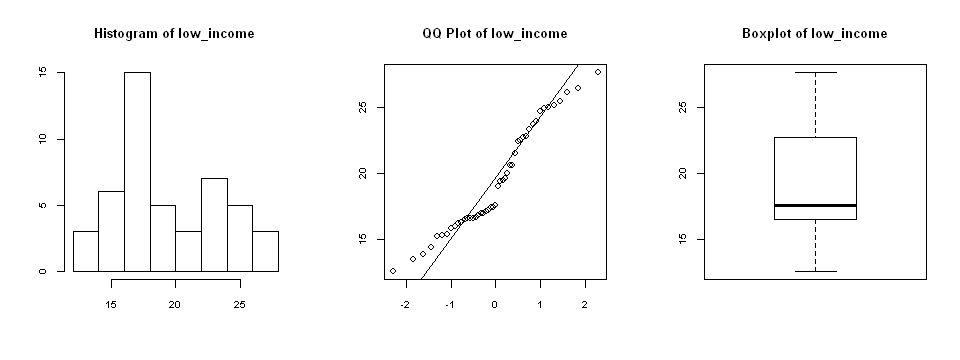

Shapiro-Wilk Test for prob_imprisonment : 
  Test Statistic: 0.9400547 
  p-value: 0.01790518 



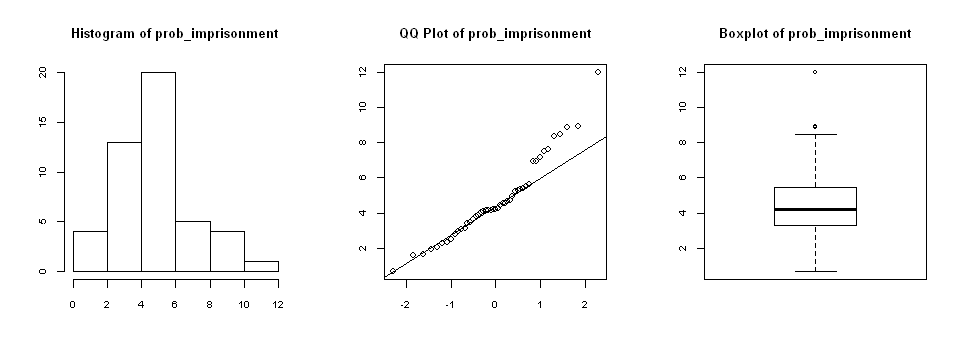

Shapiro-Wilk Test for time_served : 
  Test Statistic: 0.9805057 
  p-value: 0.6132446 



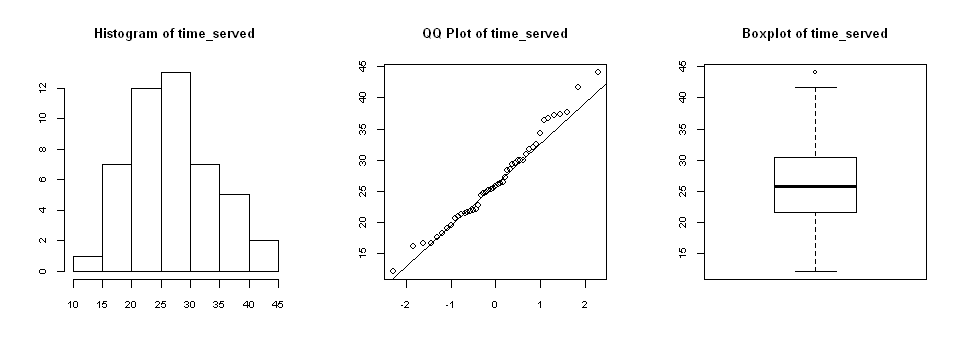

Shapiro-Wilk Test for crimes_per_million : 
  Test Statistic: 0.9127259 
  p-value: 0.001882496 



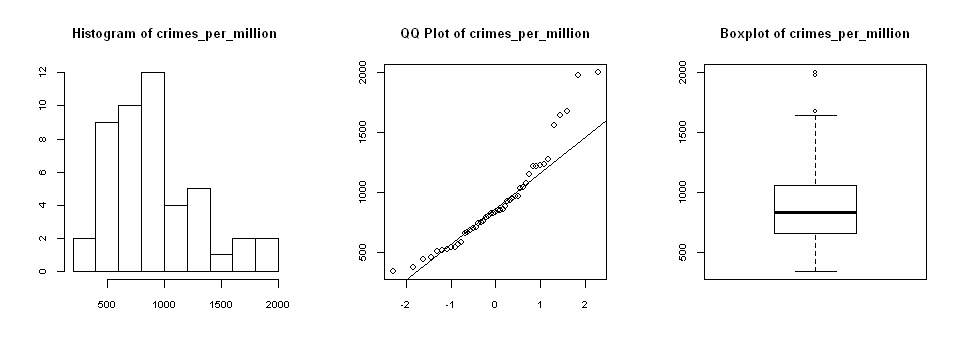

In [12]:
# Set plot area size for each plot
options(repr.plot.width=8, repr.plot.height=3)

for (col in names(crime_data)) {
  # Skip plotting the 'crimes_per_million' column
  if (col == "southern_state") next
  
  # Create a new plot window for each variable
  par(mfrow = c(1, 3))  # Set up a 1x2 layout for the plots
  
  # Plot histogram
  hist(crime_data[[col]], 
       main = paste("Histogram of", col), 
       cex.main = 1,
       xlab = "",
       ylab = "",
       cex.axis = 0.75  
  ) 
  
  # Plot QQ plot
  qqnorm(crime_data[[col]], 
         main = paste("QQ Plot of", col), 
         cex.main = 1, 
         xlab = "",     
         ylab = "",    
         cex.axis = 0.75 
  ) 
  qqline(crime_data[[col]])
    
  # Plot boxplot
  boxplot(crime_data[[col]], 
          main = paste("Boxplot of", col), 
          cex.main = 1,
          xlab = "",
          ylab = "",
          cex.axis = 0.75
  )
  
  # Perform Shapiro-Wilk test
  shapiro_test <- shapiro.test(crime_data[[col]])
  cat("Shapiro-Wilk Test for", col, ":", "\n")
  cat("  Test Statistic:", shapiro_test$statistic, "\n")
  cat("  p-value:", shapiro_test$p.value, "\n\n")
  
  # Reset the plot layout
  par(mfrow = c(1, 1))
}

When interpreting the results from this I am looking for the following:
1) Shapiro-Wilk
    * Test Statistic - This measures the discrepancy between the observed data and the expected values under the assumption of normality. Values close to 1 indicate normal distribution
    * p-value - This quantifies the strength of evidence that the null hypothesis (the data in normaly distributed) is wrong. Small p-values (typically <0.05) indicate that the data is not normally distributed.
2) Histogram - Looking for symmetry about the center value and a general bell shape
3) QQ Plot - Look that the values are close to the QQ line
4) Box-and-Whisker - Look for symmetry, whisker lengths are roughly the same size as each section of the box, and the median is in the center of the box

When inspecting the results it does show that several of the values do not follow a normal distribution. It could be beneficial for the model to do a transformation to fix this, or consider dropping those variables from the model. However, I am going to move forward with the analysis without doing this for now and will use this information later on as I "tune" the model.

##### Assumption 3 - Multicollinearity
Next I am going to check if the independent variables are highly correlated with each other. To look at this I am going to check the:
1) Correlation Matrix (same as above)
2) Tolerance - Measures the influence of one independent variable on all other independent variables, T values less than 0.1 indicate their could be multicollinearity.
3) Variance Inflation Factor (VIF) - Defined as 1 over the tolerance, a value greater than 5 indicates multicollinearity may be present.

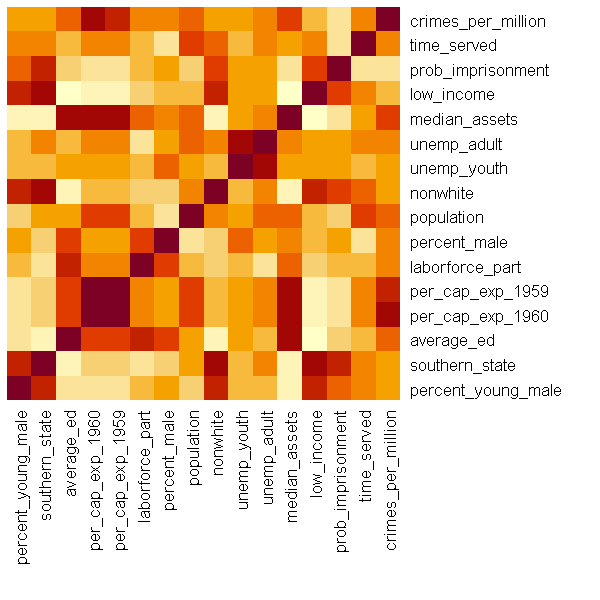

In [13]:
# Plot heatmap
options(repr.plot.width=5, repr.plot.height=5)
heatmap(correlations, symm = TRUE, margins = c(10,10), Rowv = NA, Colv = NA)

The heatmap clearly shows a strong correlation between per_cap_exp_1959 and per_cap_exp_1960, southern_state and nonwhite/low_income, and median assets with average_ed, per_cap_exp_1959, and per_cap_exp_1960. Considering eliminating some of these variables or applying a principal componenent analysis to reduce dimensionality could help solve this. But I want to see the actual values first so I will display them below.

In [14]:
# Get indices of correlations greater than cutoff (going with 0.75 but tried several values)
high_correlation_indices <- which(correlations > 0.75 & correlations < 1, arr.ind = TRUE)

# Extract row and column indices
row_indices <- high_correlation_indices[, 1]
col_indices <- high_correlation_indices[, 2]

# Extract variable names using indices
variable1 <- rownames(correlations)[row_indices]
variable2 <- colnames(correlations)[col_indices]

# Output variable names and their corresponding correlations
# Checking to make sure pair hasn't already been printed
processed_list <- list()
for (i in 1:length(variable1)) {
    if (!any(sapply(processed_list, function(pair) all(pair == c(variable1[i], variable2[i]))))) {
        cat("The variables", variable1[i], "and", variable2[i], "have a correlation of:", correlations[row_indices[i], col_indices[i]], "\n")
        processed_list <- c(processed_list, list(c(variable2[i], variable1[i])))
    }
}

The variables nonwhite and southern_state have a correlation of: 0.7671026 
The variables per_cap_exp_1959 and per_cap_exp_1960 have a correlation of: 0.9935865 
The variables median_assets and per_cap_exp_1960 have a correlation of: 0.7872253 
The variables median_assets and per_cap_exp_1959 have a correlation of: 0.7942621 


Looking at the correlation matrix and the values that are above my cutoff point, it shows that their is strong correlation between southern_state and nonwhite, per_cap_exp_1959 and per_cap_exp_1960, and median_assets and the per_cap_exp values. Next I'll calculate the Tolerance and VIF values. To do this I have to actually create the linear regression model and then use the vif() function from the car package. Since Tolerance is just the inverse of VIF I'm only going to ouput the VIF values.

In [15]:
# Fit your model (replace lm() with the appropriate function for your model)
crime_lm_model <- lm(crimes_per_million ~ ., data = crime_data)

# Calculate VIF
vif_values <- vif(crime_lm_model)

# Calculate tolerance (the inverse of VIF)
tolerance_values <- 1 / vif_values

# Display VIF and tolerance values
print(vif_values)

percent_young_male     southern_state         average_ed   per_cap_exp_1960 
          2.901436           5.346488           5.084003         104.665134 
  per_cap_exp_1959    laborforce_part       percent_male         population 
        113.595206           3.704564           3.795044           2.525761 
          nonwhite        unemp_youth        unemp_adult      median_assets 
          4.676684           6.054271           5.092605          10.556950 
        low_income  prob_imprisonment        time_served 
          8.665569           2.809092           2.714868 


The VIF values also indicate strong coliniearity for the indepent variables per_cap_exp_1959, per_cap_exp_1960, and median_assets but not for southern_state and nonwhite. For now I am going to move forward without removing any of these variables but will likely need to address the issue before our linear regression model can provide anything meaningful.

##### Assumption 4 - Limited Auto-Correlation
Autocorrelation occurs when the residuals are not independent from each other. In other words when the value of y(x+1) is not independent from the value of y(x). This atypical for data that is not time-series data so shouldn't be occuring in our model. Whith that said, for the sake of checking all the assumptions I will plot out the Residuals vs. Lagged Residuals graph and inspect the distribution for any patterns.

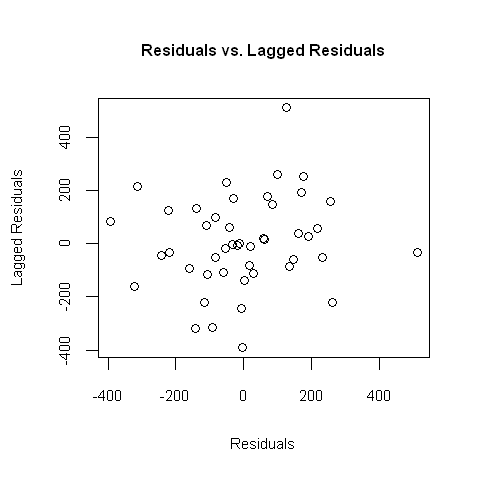

In [16]:
options(repr.plot.width=4, repr.plot.height=4)

# Get residual values
residuals <- residuals(crime_lm_model)

# Plot residuals vs. lagged residuals
lagged_residuals <- c(NA, residuals[-length(residuals)])
plot(residuals, lagged_residuals, xlab = "Residuals", ylab = "Lagged Residuals", main = "Residuals vs. Lagged Residuals", cex.axis = 0.75, cex.lab = 0.75, cex.main = 0.8)


As expected, the model doesn't show any clear patterns or funneling that would indicate we have high Auto-Correlation.

##### Assumption 5 - Homoscendasticity
Homoscedasticity, also known as homogeneity of variance, is a key assumption in linear regression. It refers to the situation where the variance of the residuals (errors) is constant across all levels of the independent variables. In other words, it means that the spread of the residuals should remain constant as the values of the predictors change. I am going to check this by plotting the Residuals vs. Fitted Values Plot. I will evaluate whether the variance of the residuals is constant across different levels of the independent variables. If the spread of residuals changes systematically with the fitted values, it indicates heteroscedasticity, violating the assumption of homoscedasticity.

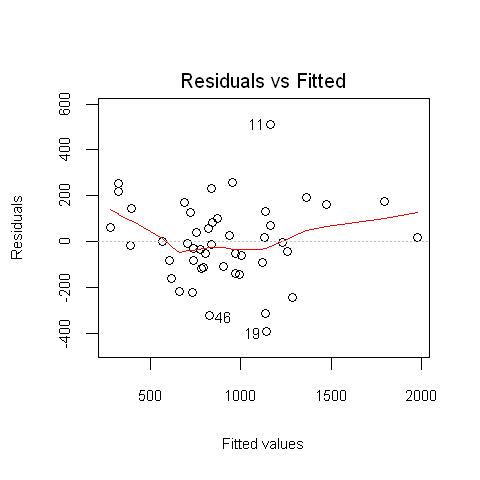

In [17]:
plot(crime_lm_model, which = 1, cex.axis = 0.75, cex.lab = 0.75, cex.main = 0.75, sub = "")

Inspecting the graph their is no disearnable pattern or funneling so their is no indication of heteroscedasticity.

#### Step 3 - Fit a Linear Regression Model to the Data and Assess the Model
Next I am going to fit the linear model to the entire dataset and asses it's quality. I already know from the analysis above that I am going to need to drop some of the variables due to colinearity and potentially transform the variable so I have multivariate normality, but I want to see what the model looks like with unchanged variables first.

In [18]:
# Create Linear Regression Model and print out the results
options(scipen = 4) # get's rid of scientific notation
crime_lm_model <- lm(crimes_per_million ~ ., data = crime_data)
crime_lm_model


Call:
lm(formula = crimes_per_million ~ ., data = crime_data)

Coefficients:
       (Intercept)  percent_young_male      southern_state          average_ed  
       -7810.18657            87.21496            -4.85551           187.76328  
  per_cap_exp_1960    per_cap_exp_1959     laborforce_part        percent_male  
         192.38265          -108.88578            -6.85354            72.19010  
        population            nonwhite         unemp_youth         unemp_adult  
          -0.72301             4.25348           -58.94416           168.43027  
     median_assets          low_income   prob_imprisonment         time_served  
           0.09478            70.40100           -48.54090            -3.43062  


In [19]:
# Print out the summary statistics for the model
summary(crime_lm_model)


Call:
lm(formula = crimes_per_million ~ ., data = crime_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-392.18  -99.17   -8.24  113.08  511.01 

Coefficients:
                      Estimate  Std. Error t value Pr(>|t|)   
(Intercept)        -7810.18657  3295.97317  -2.370  0.02421 * 
percent_young_male    87.21496    41.73991   2.089  0.04496 * 
southern_state        -4.85551   148.66879  -0.033  0.97416   
average_ed           187.76328    62.07087   3.025  0.00496 **
per_cap_exp_1960     192.38265   106.01461   1.815  0.07926 . 
per_cap_exp_1959    -108.88578   117.38723  -0.928  0.36079   
laborforce_part       -6.85354    14.66759  -0.467  0.64358   
percent_male          72.19010    81.20549   0.889  0.38086   
population            -0.72301     1.28558  -0.562  0.57789   
nonwhite               4.25348     6.47668   0.657  0.51620   
unemp_youth          -58.94416    42.03035  -1.402  0.17073   
unemp_adult          168.43027    82.28974   2.047  0.04924 * 
median_as

The model has a very low p-value which indicates a good fit to our data, however that is likely due to overfitting. The R-squared values seem reasonable as well. Looking at the independent variable Pr values the model shows that average_ed, low_income, percent_young_male, unemp_adult, and prob_imprisonment are all stastically significant predictors of crime rate. Since the model above is only using the training data I am going to perform a cross-validation of the model to get a better idea of it's actual quality.

In [20]:
# Create cross validated model
cross_val <- cv.lm(crime_data, crime_lm_model, m = 5, plotit=FALSE)

Analysis of Variance Table

Response: crimes_per_million
                   Df  Sum Sq Mean Sq F value  Pr(>F)    
percent_young_male  1   55084   55084    1.26  0.2698    
southern_state      1   15370   15370    0.35  0.5571    
average_ed          1  905668  905668   20.76 7.6e-05 ***
per_cap_exp_1960    1 3076033 3076033   70.51 1.7e-09 ***
per_cap_exp_1959    1  153024  153024    3.51  0.0705 .  
laborforce_part     1   61134   61134    1.40  0.2455    
percent_male        1  114570  114570    2.63  0.1152    
population          1   42995   42995    0.99  0.3285    
nonwhite            1   14685   14685    0.34  0.5660    
unemp_youth         1    6421    6421    0.15  0.7039    
unemp_adult         1  271395  271395    6.22  0.0182 *  
median_assets       1   35715   35715    0.82  0.3726    
low_income          1  542990  542990   12.45  0.0013 ** 
prob_imprisonment   1  223393  223393    5.12  0.0308 *  
time_served         1   10015   10015    0.23  0.6352    
Residuals      

This model doesn't give me the R^2 value which I want to use to compare to the previous model that didn't use cross validation. The formula for the R^2 value is:

$$ R^2 = 1 - (RSS)/(TSS) $$

where RSS is the sum of squares of residuals and TSS is the total sum of squares. I'll calculate both for our new model below.

In [21]:
# Obtain the R^2 value
TSS <- sum((crime_data$crimes_per_million - mean(crime_data$crimes_per_million))^2)
RSS <- attr(cross_val, "ms") * nrow(crime_data)
R_squared <- 1 - RSS/TSS
print(R_squared)

[1] 0.421


The R squared value of the cross validated model (0.421) is significantly lower than that of the model trained on the entire dataset (0.803). This indicates that our model is significantly overfitting to the training data. My guess is that is due to the  collinearity issue described above and the relatively small dataset. Next I am going to create a model with only the independent variables that have a p-value less than 0.1 from the original model. So I am going to use percent_young_male, average_ed, per_cap_exp_1960, unemp_adult, low_income, and prob_imprisonment. I will again train this model using the entire dataset and then perform cross validation to compare the results.

In [22]:
crime_lm_reduced <- lm(crimes_per_million ~ percent_young_male + average_ed + per_cap_exp_1960 + unemp_adult + low_income + prob_imprisonment, data = crime_data)
crime_lm_reduced


Call:
lm(formula = crimes_per_million ~ percent_young_male + average_ed + 
    per_cap_exp_1960 + unemp_adult + low_income + prob_imprisonment, 
    data = crime_data)

Coefficients:
       (Intercept)  percent_young_male          average_ed    per_cap_exp_1960  
           -5040.5               105.0               196.5               115.0  
       unemp_adult          low_income   prob_imprisonment  
              89.4                67.7               -38.0  


In [23]:
summary(crime_lm_reduced)


Call:
lm(formula = crimes_per_million ~ percent_young_male + average_ed + 
    per_cap_exp_1960 + unemp_adult + low_income + prob_imprisonment, 
    data = crime_data)

Residuals:
   Min     1Q Median     3Q    Max 
-470.7  -78.4  -19.7  133.1  556.2 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -5040.5      899.8   -5.60  1.7e-06 ***
percent_young_male    105.0       33.3    3.15   0.0031 ** 
average_ed            196.5       44.8    4.39  8.1e-05 ***
per_cap_exp_1960      115.0       13.8    8.36  2.6e-10 ***
unemp_adult            89.4       40.9    2.18   0.0348 *  
low_income             67.7       13.9    4.85  1.9e-05 ***
prob_imprisonment     -38.0       15.3   -2.49   0.0171 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 201 on 40 degrees of freedom
Multiple R-squared:  0.766,	Adjusted R-squared:  0.731 
F-statistic: 21.8 on 6 and 40 DF,  p-value: 3.42e-11


This  model still has a very small p-value indicating it fits our data well. It also shows that all of the independent variables we selected are still above the 0.05 significance level. Now I am going to create the model using cross-validation and calculate the R^2 value for comparison.

In [24]:
reduced_cross_val <- cv.lm(crime_data, crime_lm_reduced, m = 5, plotit=FALSE)

Analysis of Variance Table

Response: crimes_per_million
                   Df  Sum Sq Mean Sq F value  Pr(>F)    
percent_young_male  1   55084   55084    1.37 0.24914    
average_ed          1  725967  725967   18.02 0.00013 ***
per_cap_exp_1960    1 3173852 3173852   78.80 5.3e-11 ***
unemp_adult         1  217386  217386    5.40 0.02534 *  
low_income          1  848273  848273   21.06 4.3e-05 ***
prob_imprisonment   1  249308  249308    6.19 0.01711 *  
Residuals          40 1611057   40276                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


fold 1 
Observations in test set: 9 
                        1   3    17  18   19   22   36    38     40
Predicted          810.83 386 527.4 800 1221  728 1102 544.4 1140.8
cvpred             785.36 345 492.2 701 1240  702 1127 544.7 1168.2
crimes_per_million 791.00 578 539.0 929  750  439 1272 566.0 1151.0
CV residual          5.64 233  46.8 228 -490 -263  145  21.3  -17.2

Sum of squares = 439507    Mean 

In [25]:
# Obtain the R^2 value
# Already have the TSS value from above
RSS_reduced <- attr(reduced_cross_val, "ms") * nrow(crime_data)
R_squared <- RSS_reduced/TSS
print(R_squared)

[1] 0.366


This again shows some significant overfitting happening between our model trained on the entire dataset and the model trained using cross validation. It will be interesting to see how these various models predict the output for the given datapoint. The last thing I want to see is if using the variables that are univariate normally distributed and have high correlation coefficients with crimes_per_million create a better model. Again, there are better ways to select the variables (PCA) but I'm interested to see how this approach works out. I am going to train my model using the independent variables: average_ed, per_cap_exp_1960, population, median_assets, and prob_imprisonment. These all have high correlation coefficients (> 0.3) but several have low p-values when checking for their normality using the Shapiro-Wilks test so I am going to apply a logarithmic transformation to them as well. I'm also going to perform a log transformation on the crimes_per_million values since they also aren't normally distributed and it is mentioned in the documentation about the dataset. This is really just exploratory to see how it changes the results.

In [26]:
columns_to_grab <- c("average_ed", "per_cap_exp_1960", "population", "median_assets", "prob_imprisonment", "crimes_per_million")

log_crime_data <- crime_data %>%
  select(all_of(columns_to_grab)) %>%
  mutate_all(log)

# View a summary of the new dataframe
summary(log_crime_data)

   average_ed   per_cap_exp_1960   population   median_assets 
 Min.   :2.16   Min.   :1.50     Min.   :1.10   Min.   :7.97  
 1st Qu.:2.28   1st Qu.:1.83     1st Qu.:2.30   1st Qu.:8.43  
 Median :2.38   Median :2.05     Median :3.22   Median :8.59  
 Mean   :2.35   Mean   :2.08     Mean   :3.13   Mean   :8.55  
 3rd Qu.:2.44   3rd Qu.:2.35     3rd Qu.:3.73   3rd Qu.:8.69  
 Max.   :2.50   Max.   :2.81     Max.   :5.12   Max.   :8.84  
 prob_imprisonment crimes_per_million
 Min.   :-0.371    Min.   :5.83      
 1st Qu.: 1.184    1st Qu.:6.49      
 Median : 1.437    Median :6.72      
 Mean   : 1.427    Mean   :6.72      
 3rd Qu.: 1.695    3rd Qu.:6.96      
 Max.   : 2.483    Max.   :7.60      

In [27]:
log_lm <- lm(crimes_per_million ~ average_ed + per_cap_exp_1960 + population + median_assets + prob_imprisonment, data = log_crime_data)
log_lm


Call:
lm(formula = crimes_per_million ~ average_ed + per_cap_exp_1960 + 
    population + median_assets + prob_imprisonment, data = log_crime_data)

Coefficients:
      (Intercept)         average_ed   per_cap_exp_1960         population  
         13.12333            0.54656            1.17780           -0.00835  
    median_assets  prob_imprisonment  
         -1.16047           -0.13489  


In [28]:
summary(log_lm)


Call:
lm(formula = crimes_per_million ~ average_ed + per_cap_exp_1960 + 
    population + median_assets + prob_imprisonment, data = log_crime_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6572 -0.0638  0.0744  0.1931  0.4404 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       13.12333    3.38022    3.88  0.00037 ***
average_ed         0.54656    0.69032    0.79  0.43306    
per_cap_exp_1960   1.17780    0.25181    4.68 0.000031 ***
population        -0.00835    0.05226   -0.16  0.87391    
median_assets     -1.16047    0.51181   -2.27  0.02870 *  
prob_imprisonment -0.13489    0.10599   -1.27  0.21029    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3 on 41 degrees of freedom
Multiple R-squared:  0.525,	Adjusted R-squared:  0.468 
F-statistic: 9.08 on 5 and 41 DF,  p-value: 0.00000714


The model seems to be worse, it has a higher p_value and a lower R-squared value. I am going to move forward with the crime_lm_reduced model.

#### Step 4 - Use the Model to Predict the Crime Rate for the Given Data Point
Finally, I am going to use my reduced model crime_lm_reduced to predict the crime rate for the given data point.

In [29]:
# Load the given data point
predict_point <-data.frame(percent_young_male = 14.0, southern_state = 0, average_ed = 10.0, per_cap_exp_1960 = 12.0, per_cap_exp_1959 = 15.5, laborforce_part = 64.0, percent_male = 48.453608247, population = 150, nonwhite = 1.1, unemp_youth = 12.0, unemp_adult = 3.6, median_assets = 3200, low_income = 20.1, prob_imprisonment = 4.0, time_served = 39.0)
prediction_original <- predict(crime_lm_model, predict_point)
prediction_reduced <- predict(crime_lm_reduced, predict_point)
cat("The original model using all of the indpendent variables predicts:", prediction_original, "\n")
cat("The reduced model only using the statistically significant indpendent variables predicts:", prediction_reduced)

The original model using all of the indpendent variables predicts: 154 
The reduced model only using the statistically significant indpendent variables predicts: 1304

I'm really suprised with how drastically off the prediction was using the original model that included all of the independent variables. The range of values seen for the crimes_per_million is 342 - 1993 which the predicted value is well outside of. The reduced model seems to give a much more reasonable prediction.

#### Step 5 - Provide a Summary of the Final Model
After looking at a few models I decided that the linear regression model using the limited indpendent variables (percent_young_male, average_ed, per_cap_exp_1960, unemp_adult, low_income, and prob_imprisonment) provided a better overall model. It has a R-Squared value of 0.766 and a p-value of 3.42e-11. It predicted that the value crimes_per_million for the given data point would be 1,304. The equation it produced can be seen below:

<small>$$ crime\_per\_million = -5040.5 + 105(\% young\_male) + 196.5(avg\_ed) + 115(per\_cap\_exp\_1960) + 89.4(unemp\_adult) + 67.6(low\_income) - 38(prob\_imprisonment) $$<small>

The average education coefficient being positive is intersting, it indicates that as education goes up so does the crime rate. The other thing I found interesting is that probability of imprisonment has a positive coefficient, meaning this *could be a way to reduce crime. Next I'll plot the results of the lm model.

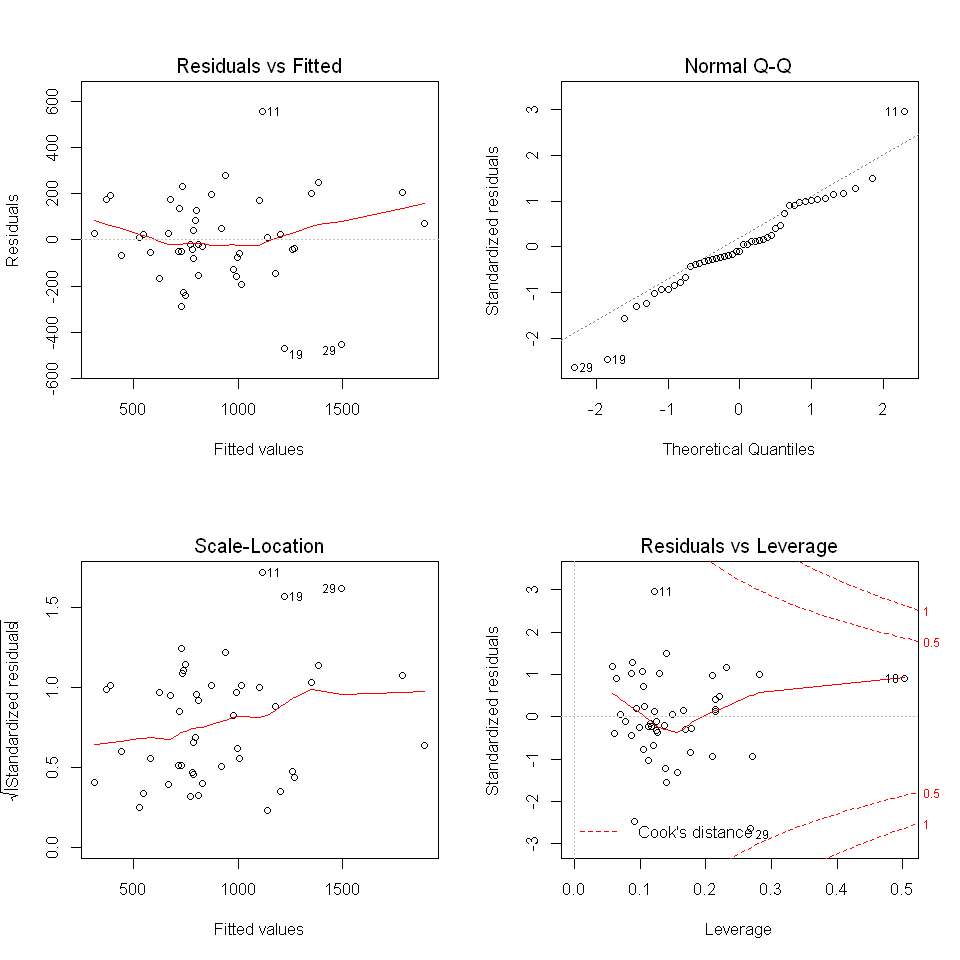

In [42]:
# Set up the layout for a 2x2 grid
par(mfrow = c(2, 2))

# Set plot size
options(repr.plot.width=8, repr.plot.height=8)

# Plot 1
plot(crime_lm_reduced, sub = "")

These four plots can help in assessing whether the linear model is appropriate for our crimes dataset. Looking at each plot:
1) Residuals vs. Fitted - Checks for Homoscendasticity. When there is little or no homoscendasticity we expect the residuals to have constant variance and that the residuals and fitted values will be uncorrelated. Since their is no clear trend or funneling in the plot this is a good indication that our model meets the homoscendasticity requirement.
2) Normal QQ Plot - You can use a linear model for prediction even if the underlysing multivariate normality assumptions don't hold. However, in order for the p-values to be believable the residuals from the regression must look approximately normally distributed. The residuals on the plot appear non-normal, both the lower tail and upper tail are heavier than expected. This indicates that some sort of transformation might be appropriate.
3) Scale-location plot - Similar to the residuals vs. fitted plot their should be no descernable trends. Looking at the graph I don't see any obvious trends or funneling.
4) Residuals vs. Leverage - Leverage is a measure of how much an observation influenced the model fit. It’s a one-number summary of how different the model fit would be if the given observation was excluded, compared to the model fit where the observation is included. Points with high residual (poorly described by the model) and high leverage (high influence on model fit) are outliers. They’re skewing the model fit away from the rest of the data, and don’t really seem to fit with the rest of the data. Some of the points appear to get close to Cook's distance (29 and 11) which indicates they could be outliers.t of the data.